In [119]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [120]:
from keras.layers import Dense, LSTM, Dropout, BatchNormalization, Activation
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import optimizers

In [17]:
tf.keras.backend.set_floatx('float64')

In [110]:
sp = pd.read_csv('sp500_dataset.csv')
sp.set_index('Date',inplace=True)
sp.drop(['Volume','vol_next'],axis=1,inplace=True)

In [19]:
sp.head()

,Return,volume_ch,hilo,intraday,2dvar,5dvar,20dvar,60dvar,next_2d_var
Date,,,,,,,,,
2010-03-31,-0.003273,0.097758,0.007540,-0.001980,0.002344,0.003392,0.004732,0.008946,0.007557
2010-04-01,0.007414,-0.106475,0.009174,0.005866,0.007557,0.004360,0.004863,0.008984,0.000364
2010-04-05,0.007928,-0.031259,0.007652,0.007406,0.000364,0.004937,0.004252,0.009033,0.004415
2010-04-06,0.001684,0.052700,0.007635,0.002892,0.004415,0.004830,0.004220,0.009024,0.005346
2010-04-07,-0.005877,0.248459,0.010491,-0.004864,0.005346,0.006195,0.004591,0.009059,0.006541


In [111]:
x,y = sp.drop('next_2d_var',axis=1),sp['next_2d_var']
x = np.array(x)
y = np.array(y)
x_train,x_test = x[:1850],x[1850:]
y_train,y_test = y[:1850],y[1850:]
x_train = x_train.reshape(x_train.shape[0],1,x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0],1,x_test.shape[1])
y_train = y_train.reshape(y_train.shape[0],1,1)
y_test = y_test.reshape(y_test.shape[0],1,1)

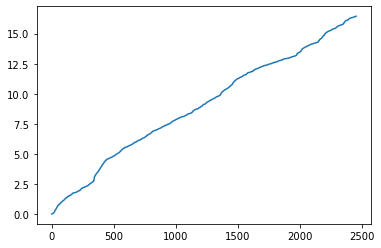

In [90]:
plt.plot(y)

In [125]:
lstm = Sequential()
adam = optimizers.Adam(learning_rate=.0001) 
esm = EarlyStopping(patience=5)
lstm.add(BatchNormalization())
lstm.add(LSTM(1,batch_input_shape=(1,3),return_sequences=True,activation='sigmoid'))
lstm.add(Dropout(.2))
lstm.compile(loss='mean_squared_error',optimizer=adam,metrics=[keras.metrics.MeanSquaredError()])
test = lstm.fit(x_train,y_train,epochs=1000,batch_size = 16, validation_data=(x_test,y_test),callbacks=[esm])

Epoch 1/1000
116/116 [==============================] - 2s 3ms/step - loss: 0.0975 - mean_squared_error: 0.0975 - val_loss: 0.0723 - val_mean_squared_error: 0.0723
Epoch 2/1000
116/116 [==============================] - 0s 1ms/step - loss: 0.0932 - mean_squared_error: 0.0932 - val_loss: 0.0683 - val_mean_squared_error: 0.0683
Epoch 3/1000
116/116 [==============================] - 0s 1ms/step - loss: 0.0877 - mean_squared_error: 0.0877 - val_loss: 0.0645 - val_mean_squared_error: 0.0645
Epoch 4/1000
116/116 [==============================] - 0s 1ms/step - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.0610 - val_mean_squared_error: 0.0610
Epoch 5/1000
116/116 [==============================] - 0s 1ms/step - loss: 0.0797 - mean_squared_error: 0.0797 - val_loss: 0.0570 - val_mean_squared_error: 0.0570
Epoch 6/1000
116/116 [==============================] - 0s 1ms/step - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.0535 - val_mean_squared_error: 0.0535
Epoch 7/1000
116

In [29]:
results = lstm2.predict(x_test)

In [30]:
results.shape

(605, 1, 1)

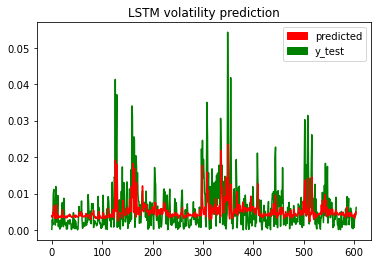

In [124]:
results = lstm.predict(x_test)
results = results.reshape(605,1)
y_test = y_test.reshape(605,1)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.title('LSTM volatility prediction')
red_patch = mpatches.Patch(color='red', label='predicted')
green_patch = mpatches.Patch(color='green', label='y_test')
plt.legend(handles=[red_patch,green_patch])
plt.plot(y_test,c='green')
plt.plot(results,c='red')

Text(0.5, 1.0, 'Results vs Predicted')

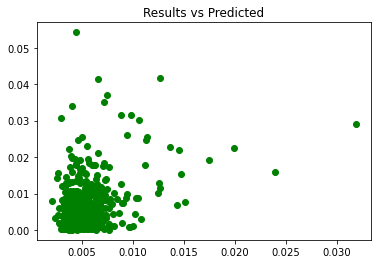

In [118]:
plt.scatter(results,y_test,c='green')
plt.title('Results vs Predicted')